Encoders, inherently would convert a data to its limited dimentions. This is because the input of the encoder has more neurons in comparison to its output.

Dimentionality reduction speaking, encouders perform like PCA. In their ideal form, they should reduce dimentions however they have to save as much information as they can. 

If you have a data with 20 features, for instance, and you want reduce the features to something like 3 or 4 features, nonetheless you want save the information you can use the encoders!!!

To make a propoer encoder we need the combination of encoder and decoder so that the model wuold be well trained based on the input and output then we can neglect the decoder part and only focus on the encoder!!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


C:\Users\moham\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.datasets import make_blobs

Note: make_blobs is a function to make datasets!!

In [3]:
data=make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1.0, random_state=101 )

Note: centers are the clusters, for instance 0 and 1 are two centers.


Note: The data is a tuple with two arrays!

Standard Deviation (cluster_std): It's a measure of how spread out the numbers are in a dataset. A low standard deviation means the points are close to the mean, while a high standard deviation means the points are spread out over a wider range of values.

In [4]:
x,y=data

In [5]:
#x

In [6]:
#y

Note: We want to add a third feature to this dataset which is a noise!

In [7]:
np.random.seed(seed=101)
z_noise=np.random.normal(size=len(x))
z_noise=pd.Series(z_noise)

In [8]:
z_noise.head()

0    2.706850
1    0.628133
2    0.907969
3    0.503826
4    0.651118
dtype: float64

In [9]:
feat=pd.DataFrame(x)

In [10]:
feat.head()

,0,1
0,-8.877721,-6.760078
1,0.630638,3.107075
2,-0.240609,2.820690
3,-7.839091,-8.207545
4,-10.972908,-7.390676


In [11]:
feat=pd.concat([feat,z_noise], axis=1)

In [12]:
feat.columns=['X1','X2','X3']

In [13]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


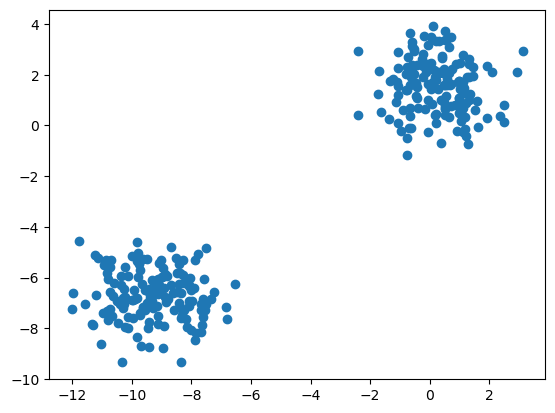

In [14]:
plt.scatter(feat['X1'], feat['X2'])

In [15]:
from mpl_toolkits.mplot3d import Axes3D

In [16]:
#%matplotlib notebook

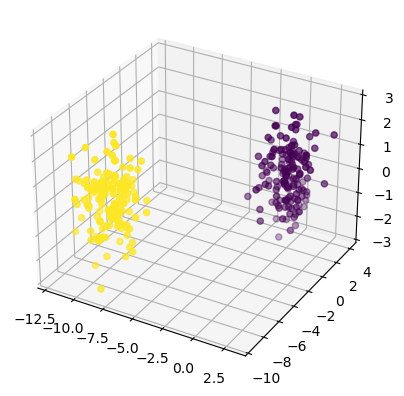

In [17]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'], feat['X3'], c=y)

c=y is used to specify the colors of the points in the 3D scatter plot. Here's a breakdown of what it does:

feat['X1'], feat['X2'], feat['X3']: These are the coordinates of the points in the 3D space.


y: This is typically a list or array of labels or values that determine the color of each point.

Note: Here we want to use autoencoder to reduce the dimention and also save the important information. Normally the aoutoencoder should recognize the noise and remove it!

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
from tensorflow.keras.optimizers import SGD

Note: we have three features. Thus, we would get the three features with the three neourons, then we add another layer with two neourons to decrease the dimention from 3 to 2 (here the encoding would happen) then in the last layer (decoding) we have three features again!

3--->2---->3

In [20]:
encoder=Sequential()
encoder.add(Dense(units=2, activation='relu', input_shape=[3]))
#the code shows that the input has three neourns, but in the next layer, hidden layer we have 2 neournos as unit=2

C:\Users\moham\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
decoder=Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape=[2]))
#in the decoder we start with the 2 neourns to get the reduced dimentions and then would convert it to the 3 again

In [22]:
autoencoder=Sequential([encoder,decoder])

In [23]:
sgd_optimizer = SGD(learning_rate=0.6)

In [24]:
autoencoder.compile(loss='mse',optimizer=sgd_optimizer)
#typically for SGD lr is 1.5

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
scaled_data=scaler.fit_transform(feat)

In [27]:
#scaled_data

In [28]:
autoencoder.fit(scaled_data,scaled_data, epochs=8)

Epoch 1/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1673  
Epoch 2/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 0.1337
Epoch 3/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.1193
Epoch 4/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - loss: 0.1186
Epoch 5/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 0.1220
Epoch 6/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.1196
Epoch 7/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1262 
Epoch 8/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - loss: 0.1222


In [29]:
encoded_2dim=encoder.predict(scaled_data)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [30]:
encoded_2dim

array([[0.        , 0.8372611 ],
       [0.75741273, 0.8455149 ],
       [0.6885106 , 0.8538193 ],
       [0.13295905, 0.58600026],
       [0.        , 0.49250886],
       [0.0800152 , 0.36105993],
       [0.8306683 , 0.6722779 ],
       [0.01789308, 0.5092536 ],
       [0.9172453 , 0.4697022 ],
       [0.70914084, 0.8480881 ],
       [0.08112629, 0.50727785],
       [0.06437577, 0.3163186 ],
       [0.7871099 , 0.7815915 ],
       [0.23002823, 0.40259194],
       [0.84725446, 0.66492915],
       [0.1396745 , 0.65295446],
       [0.7029687 , 0.74251753],
       [0.6426007 , 1.0358955 ],
       [0.51725805, 1.0673339 ],
       [0.7195323 , 0.88598514],
       [0.0310224 , 0.45495632],
       [0.6492459 , 0.9633968 ],
       [0.92074966, 0.5300867 ],
       [0.18989262, 0.3179685 ],
       [0.00491064, 0.37682235],
       [0.73826057, 0.8069738 ],
       [0.7274576 , 0.74421144],
       [0.75906456, 0.8210048 ],
       [0.03816665, 0.55963284],
       [0.03145085, 0.42284286],
       [0.

In [31]:
encoded_2dim.shape

(300, 2)

In [32]:
scaled_data.shape

(300, 3)

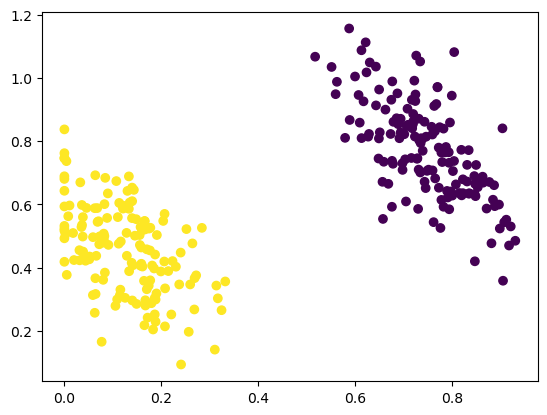

In [33]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1], c=y)